# Libraries 

In [ ]:
# ttest_ind: This function performs a two-sample t-test. It tests the null hypothesis that two independent samples have identical average (expected) values.
# Usage: ttest_ind(sample1, sample2)

# ttest_1samp: This function performs a one-sample t-test. It tests the null hypothesis that the mean of a single sample is equal to a known value.
# Usage: ttest_1samp(sample, popmean)

# pearsonr: This function calculates the Pearson correlation coefficient and the p-value for testing non-correlation. The Pearson correlation coefficient measures the linear relationship between two datasets.
# Usage: pearsonr(x, y)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
from scipy.stats import ttest_ind, ttest_1samp,pearsonr

Health expectancy

In [3]:
df =sns.load_dataset('healthexp')

In [4]:
df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


In [5]:
df_filtred =df.query('Year>=2000 and Year<=2020' and 'Country=="USA"')

<Axes: xlabel='Spending_USD', ylabel='Life_Expectancy'>

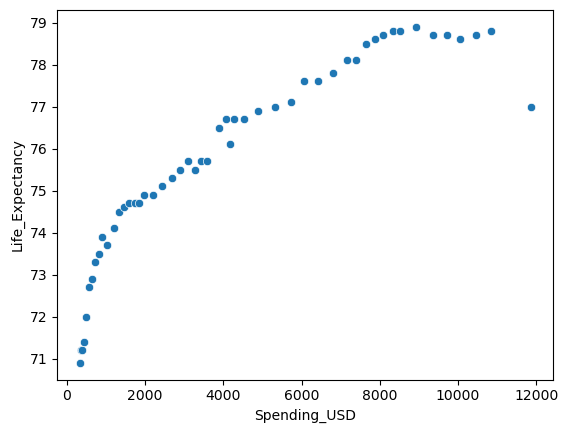

In [9]:
sns.scatterplot(data = df_filtred, x=df_filtred['Spending_USD'], y=df_filtred['Life_Expectancy'])

In [7]:
pearsonr(df_filtred['Spending_USD'],df_filtred['Life_Expectancy'])

PearsonRResult(statistic=0.9068518134395097, pvalue=5.1027833027668494e-20)

In [6]:
pearsonr(df['Spending_USD'],df['Life_Expectancy'])

PearsonRResult(statistic=0.5794304588530952, pvalue=5.704081208901827e-26)